<a href="https://colab.research.google.com/github/Emtiaz-pro/CVPR/blob/main/MID/digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Classification**

In [1]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# 2. Load MNIST dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for CNN
x_train = np.expand_dims(x_train, -1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# 3. Build Model

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 4. Train

model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# 5. Evaluate

loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


# 6. Save Model

model.save("mnist_model.h5")
print("✅ Model saved as mnist_model.h5")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8790 - loss: 0.3887 - val_accuracy: 0.9822 - val_loss: 0.0596
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9846 - loss: 0.0514 - val_accuracy: 0.9878 - val_loss: 0.0426
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.9888 - val_loss: 0.0391
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.9878 - val_loss: 0.0412
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9935 - loss: 0.0189 - val_accuracy: 0.9908 - val_loss: 0.0350
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9902 - val_loss: 0.0324
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9969 - loss: 0.0098 - val_accuracy: 0.9910 - val_loss: 0.0350
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9974 - loss: 0.0094 - val_accuracy: 0

Test Accuracy: 99.15%
✅ Model saved as mnist_model.h5


In [2]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9901 - val_loss: 0.0330
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9972 - loss: 0.0079 - val_accuracy: 0.9916 - val_loss: 0.0318
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9929 - val_loss: 0.0330
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.9904 - val_loss: 0.0382
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9979 - loss: 0.0066 - val_accuracy: 0.9909 - val_loss: 0.0405
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9912 - val_loss: 0.0424
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9987 - loss: 0.0042 - val_accuracy: 0.9902 - val_loss: 0.0438
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9981 - loss: 0.004

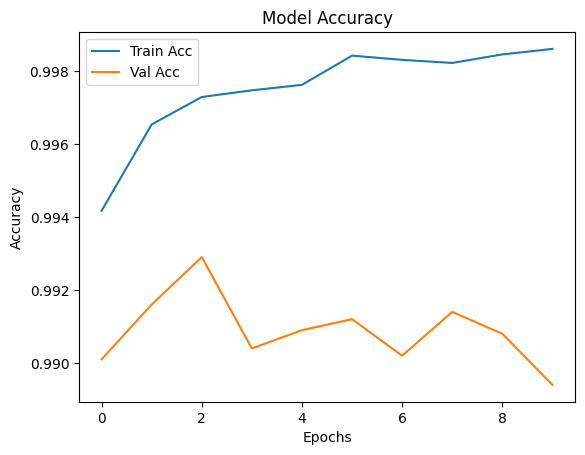

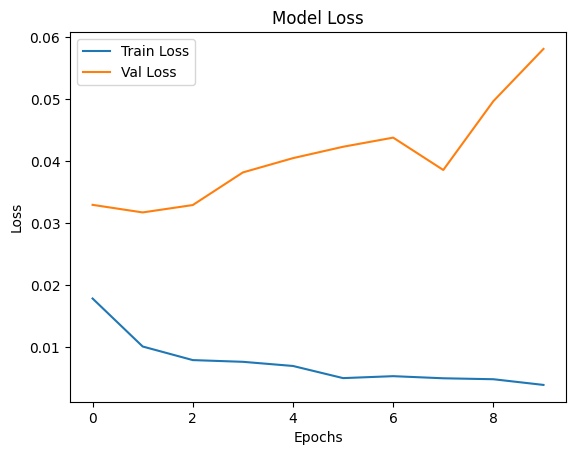

In [3]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step


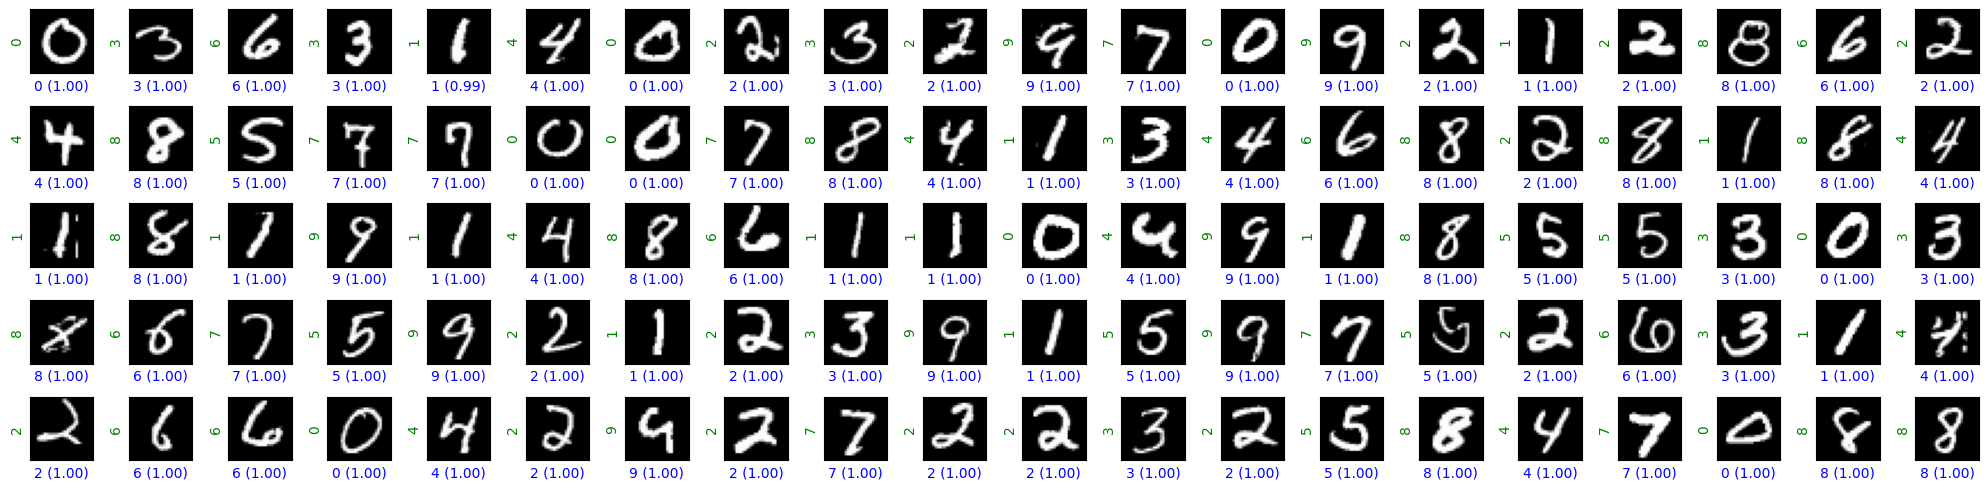

In [4]:
# Make predictions
import random
ROWS = 5
COLS = 20
random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]

predictions = model.predict(sample_images)

# Plot results
plt.figure(figsize=(20, 5))
i = 0
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])

        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]

        # Label with prediction + confidence
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence:.2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence:.2f})", color='r')

        # True label on Y-axis
        plt.ylabel(sample_labels[i], color='g')
        i += 1

plt.tight_layout()
plt.show()

In [5]:
def test(i):
    img = x_test[i]

    # reshape for prediction
    predictions = model.predict(img.reshape(1, 28, 28, 1), verbose=0)

    plt.figure()
    plt.imshow(img, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    # True label
    plt.ylabel(f"True Label: {y_test[i]}", color='g')

    # Prediction
    prediction = np.argmax(predictions)
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"Prediction = {prediction} (Confidence = {confidence:.2f})", color='b')
    else:
        plt.xlabel(f"Prediction = {prediction} (Confidence = {confidence:.2f})", color='r')
    plt.show()

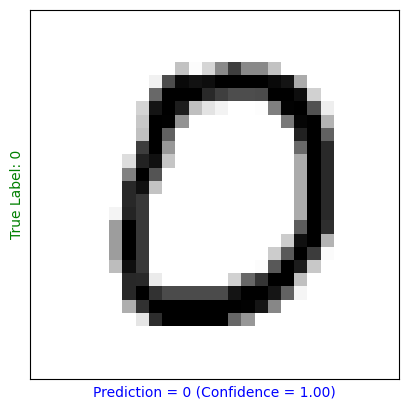

In [6]:
test(10)

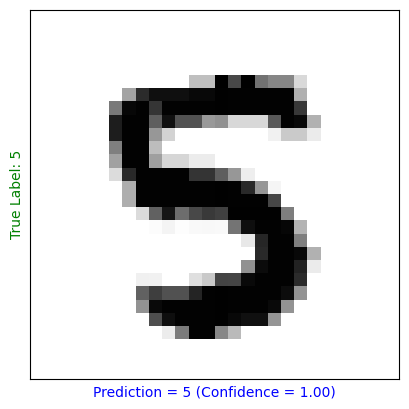

In [7]:
test(120)

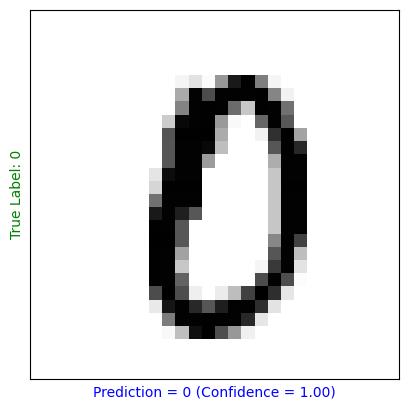

In [8]:
test(55)

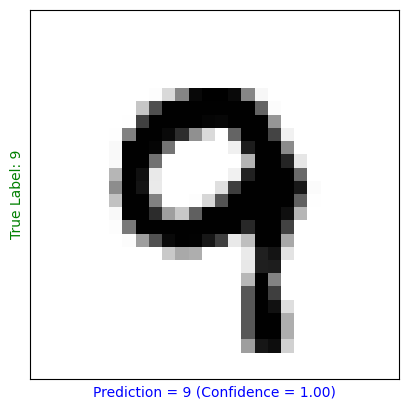

In [9]:
test(99)